In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv') 

In [4]:
print(train_df.shape)  # size check
print(test_df.shape) 

(10886, 12)
(6493, 9)


In [5]:
train_df.info() 
# datatime --> object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test_df.info() 
# datatime --> object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
# datatime column: 년-월-일 시:분: 초 가공 
# datatime: 년,월,일,시간 4개에 속성으로 분리 
# train, test 2개 all 
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
test_df['datetime'] = pd.to_datetime(test_df['datetime'])


train_df['year'] = train_df['datetime'].apply(lambda x: x.year)
train_df['month'] = train_df['datetime'].apply(lambda x: x.month)
train_df['day'] = train_df['datetime'].apply(lambda x: x.day)
train_df['hour'] = train_df['datetime'].apply(lambda x: x.hour)

test_df['year'] = test_df['datetime'].apply(lambda x: x.year)
test_df['month'] = test_df['datetime'].apply(lambda x: x.month)
test_df['day'] = test_df['datetime'].apply(lambda x: x.day)
test_df['hour'] = test_df['datetime'].apply(lambda x: x.hour)

In [8]:
train_df.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [9]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [10]:
# year, month, day, hour column add 
# datetime drop
train_df = train_df.drop(['datetime','casual','registered'], axis=1)
test_df = test_df.drop(['datetime'], axis=1)

In [11]:
# 성능 평가 
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmlse = np.sqrt(np.mean(squared_error))
    return rmlse

C:\Users\leehj\AppData\Local\Temp\ipykernel_7548\2270207515.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['count'])
e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

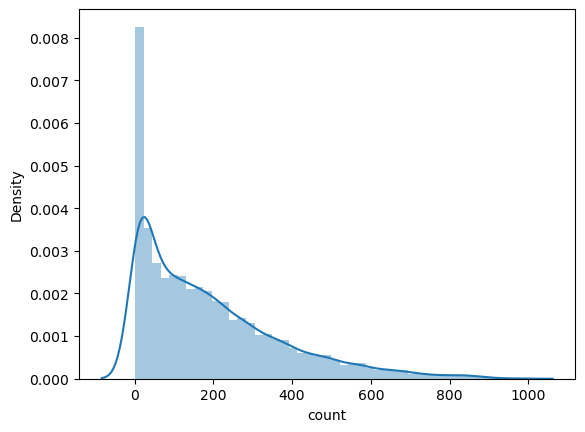

In [12]:
# 선형 회귀 모델 
# 자전거 대여 횟수 에측
# 정규 분포 확인
# 0~200 사이 왜곡 --> 왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법 --> 로그적용
# log1p() 사용 
sns.distplot(train_df['count']) 

C:\Users\leehj\AppData\Local\Temp\ipykernel_7548\1047989657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train_df['count']))
e:\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Density'>

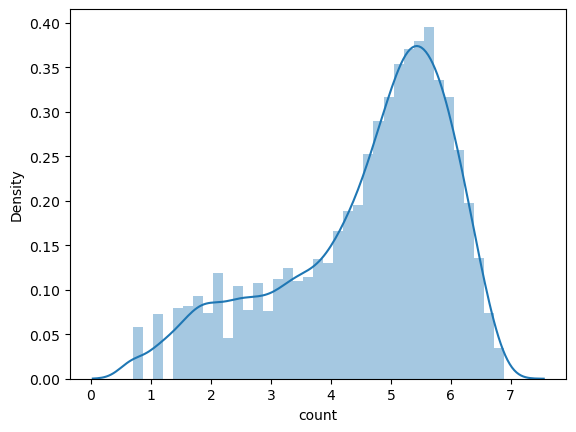

In [13]:
sns.distplot(np.log1p(train_df['count']))
# log1p를 사용하여 왜곡 정도가 향상
# linearRegression 모델 학습후 평가 

In [14]:
train_df['count'] = np.log1p(train_df['count']) 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

x_train, x_test, y_train, y_test = train_test_split(train_df.drop(['count'], axis=1), train_df['count'], test_size=0.3) 

In [15]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('rmsle:', rmsle(y_test_exp, pred_exp))

rmsle: 1.011104530401671


<Axes: >

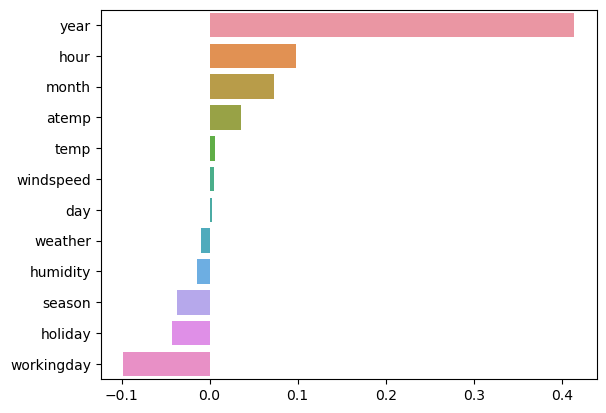

In [16]:
# 픽처 회귀 계수 값 시각화 
coef = pd.Series(lr_reg.coef_, index=x_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [17]:
train_df = pd.get_dummies(train_df, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])
test_df = pd.get_dummies(test_df, columns=['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [18]:
print(train_df.shape)
print(test_df.shape) 

(10886, 74)
(6493, 66)


In [19]:
# test_df, train_df 두 객체에 동시 정렬
# 누락된 값도 처리 
train_df, test_df = train_df.align(test_df, join='left', axis=1) 
test_df = test_df.drop(['count'], axis=1)   

In [20]:
print(train_df.shape)
print(test_df.shape) 

(10886, 74)
(6493, 73)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(train_df.drop(['count'], axis=1), train_df['count'], test_size=0.3) 

In [22]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LinearRegression RMSLE:', rmsle(y_test_exp, pred_exp))

# rmsle를 사용한 실제값과 예측값 사이의 로그 차이를 제곱하고 평균을 낸후, 제곱근을 취한 값 
# 예측 값이 실제 값에 얼마나 잘 맞는지: LinearRegression RMSLE

LinearRegression RMSLE: 0.5944246945267535


In [23]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(x_train, y_train)
pred = ridge_reg.predict(x_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Ridge RMSLE:', rmsle(y_test_exp, pred_exp)) 
# Ridge RMSLE 
# Ridge: 선형회귀 모델에 L2를 정규화를 추가한 것 

Ridge RMSLE: 0.5962226578323805


In [24]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(x_train, y_train)
pred = lasso_reg.predict(x_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Lasso RMSLE:', rmsle(y_test_exp, pred_exp))
# Lasso: 선형회귀 모델에 L1 정규화를 추가하는 것 

Lasso RMSLE: 0.6430092908043211


<Axes: >

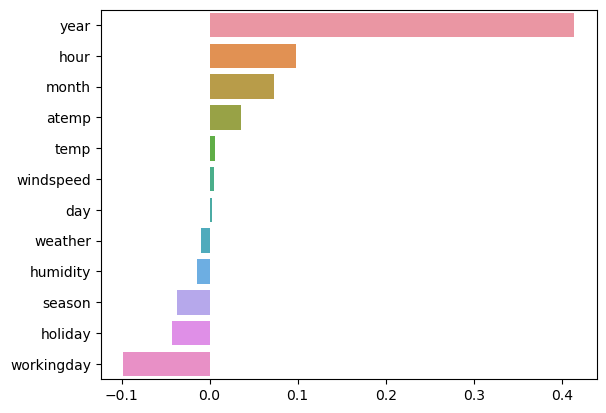

In [25]:
# 원-핫 인코딩 적용 --> 결과적으로 선형회귀의 예측 성능 많이 향상
# 회귀계수가 높은 피처 시각화(25개)
coof = pd.Series(lr_reg.coef_, index=x_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index) 

####### 월, 주말, 주중 등 자전거를 타는 데 필요한 피쳐 회귀 계수가 증가 